In [52]:
import pandas as pd

In [53]:
import numpy as np

In [54]:
import matplotlib.pyplot as plt

In [55]:
import seaborn as sns

In [56]:
from pandas import Series

In [57]:
from pandas import DataFrame

In [58]:
from sklearn.model_selection import train_test_split

In [72]:
data_url='http://www.dsi.uminho.pt/~pcortez/forestfires/forestfires.csv'

In [73]:
sale=pd.read_csv(data_url)

In [74]:
sale.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [75]:
sale.shape

(517, 13)

In [77]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
X=sale.loc[:,['FFMC','DMC']]
X_train, X_cv, y_train, y_cv = train_test_split(X,sale.DC)

In [80]:
#training the model
lreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [82]:
#predicting on cv
pred = lreg.predict(X_cv)
#calculating mse
mse = np.mean((pred - y_cv)**2)

In [83]:
mse

31801.489568381083

In [85]:
# calculating coefficients
coeff = DataFrame(X_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_)
coeff

,0,Coefficient Estimate
0,FFMC,2.561144
1,DMC,2.500167


In [86]:
lreg.score(X_cv,y_cv)

0.5091288011393433

In [90]:
x = sale.loc[:,['FFMC','DMC','ISI']]

# splitting into training and cv for cross validation
X_train, X_cv, y_train, y_cv = train_test_split(X,sale.DC)

In [91]:
## training the model

lreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [93]:
#predicting on cv 

pred = lreg.predict(X_cv)

# calculating mse

mse = np.mean((pred - y_cv)**2)

mse

35082.52691656179

In [95]:
## calculating coefficients

coeff = DataFrame(X_train.columns)

coeff['Coefficient Estimate'] = Series(lreg.coef_)

In [96]:
coeff

,0,Coefficient Estimate
0,FFMC,6.584670
1,DMC,2.502607


Text(0.5,1,'Residual plot')

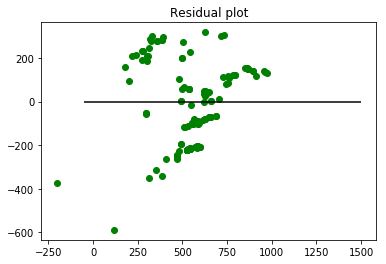

In [102]:
# residual plot
pred_cv = lreg.predict(X_cv)
X_plot = plt.scatter(pred_cv, (pred_cv - y_cv), c='g')

plt.hlines(y=0, xmin= -50, xmax=1500)

plt.title('Residual plot')

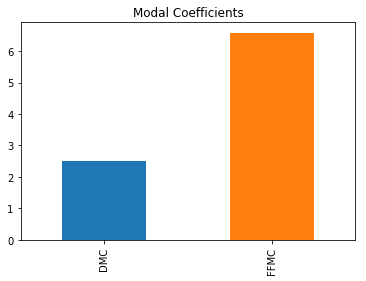

In [103]:
# checking the magnitude of coefficients

predictors = X_train.columns

coef = Series(lreg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

In [104]:
from sklearn.linear_model import Ridge

## training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(X_train,y_train)

pred = ridgeReg.predict(X_cv)

# calculating mse

mse = np.mean((pred_cv - y_cv)**2)

## calculating score 
ridgeReg.score(X_cv,y_cv)

0.4028215778979971

In [107]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.3, normalize=True)

lassoReg.fit(X_train,y_train)

pred = lassoReg.predict(X_cv)

# calculating mse

mse = np.mean((pred_cv - y_cv)**2)

mse

35082.52691656179

In [108]:
lassoReg.score(X_cv,y_cv)

0.4155275372254016